# Sea level curves
***code prepared by Alessio Rovere, MARUM, University of Bremen, DE. Contact: arovere@marum.de<br>
Date: 22/09/2020***

This script compares published sea-level curves with sea-level observations organised into a pandas dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as patches

## Sea level curves
The script plots the following curves.

### de Boer et al., 2014
*de Boer, B., et al. (2014) Persistent 400,000-year variability of Antarctic ice volume and the carbon cycle is revealed throughout the Plio-Pleistocene. Nature Communications 5, 2999.*

Retrieved from the original publication.

### Stap et al., 2017
*Stap, L. B., Van De Wal, R. S., De Boer, B., Bintanja, R., & Lourens, L. J. (2017). The influence of ice sheets on temperature during the past 38 million years inferred from a one-dimensional ice sheet-climate model. Climate of the Past, 13(9), 1243-1257.*

Retrieved from the original publication.

### Rohling et al., 2014
*Rohling, E. J., Gavin L. Foster, K. M. Grant, Gianluca Marino, A. P. Roberts, Mark E. Tamisiea, and Frances Williams. "Sea-level and deep-sea-temperature variability over the past 5.3 million years." Nature 508, no. 7497 (2014): 477-482*

Retrieved from the personal website of EElco Rohling, "data in Figure 2" of Rohling et al., 2014.
 
### de Boer et al., 2010
*de Boer, B., Van de Wal, R. S. W., Bintanja, R., Lourens, L. J. & Tuenter, E. Cenozoic global ice-volume and temperature simulations with 1-D ice-sheet models forced by benthic d18O records. Ann. Glaciol. 51, 23–33 (2010).*

Retrieved from the personal website of EElco Rohling, "data in Figure 2" of Rohling et al., 2014.

### Sosdian and Rosenthal, 2009
*Sosdian, S. & Rosenthal, Y. Deep-sea temperature and ice volume changes across the Pliocene-Pleistocene climate transitions. Science 325, 306–310 (2009).*

Retrieved from the personal website of EElco Rohling, "data in Figure 2" of Rohling et al., 2014.

### Elderfield et al., 2012
*Elderfield, H. et al.Evolution of ocean temperature and ice volume through the MidPleistocene Climate Transition. Science 337, 704–709 (2012).*

Retrieved from the personal website of EElco Rohling, "data in Figure 2" of Rohling et al., 2014.

### Miller et al., 2012 / Naish et al., 2009
*Miller, K. G. et al. High tide of the warm Pliocene: implications of global sea level for Antarctic deglaciation. Geology 40, 407–410 (2012).*

*Naish, T. et al. Obliquity-paced Pliocene West Antarctic ice sheet oscillations. Nature 458, 322–328 (2009).*

Retrieved from the personal website of EElco Rohling, "data in Figure 2" of Rohling et al., 2014.

### Stap et al., 2016
*Stap, L.B., de Boer, B., Ziegler, M., Bintanja, R., Lourens, L.J. and van de Wal, R.S., 2016. CO2 over the past 5 million years: Continuous simulation and new δ11B-based proxy data. Earth and Planetary Science Letters, 439, pp.1-10.*

Retrieved from the original publication.

### Grant et al., 2014
*Grant, K.M., Rohling, E.J., Ramsey, C.B., Cheng, H., Edwards, R.L., Florindo, F., Heslop, D., Marra, F., Roberts, A.P., Tamisiea, M.E. and Williams, F., 2014. Sea-level variability over five glacial cycles. Nature communications, 5(1), pp.1-9.*

Retrieved from the original publication.

### Rohling et al., 2014 recalculated
*Rohling, E. J., Gavin L. Foster, K. M. Grant, Gianluca Marino, A. P. Roberts, Mark E. Tamisiea, and Frances Williams. "Sea-level and deep-sea-temperature variability over the past 5.3 million years." Nature 508, no. 7497 (2014): 477-482*

Recalculated by 

*Dumitru, O.A., Austermann, J., Polyak, V.J., Fornós, J.J., Asmerom, Y., Ginés, J., Ginés, A. and Onac, B.P., 2019. Constraints on global mean sea level during Pliocene warmth. Nature, 574(7777), pp.233-236.*

Retrieved from Dumitru et al., 2019, "data in Figure 3".

### Lisiecky and Raymo, 2004
*Lisiecki, L.E. and Raymo, M.E., 2005. A Pliocene‐Pleistocene stack of 57 globally distributed benthic δ18O records. Paleoceanography, 20(1).*

Scaled by 

*Dumitru, O.A., Austermann, J., Polyak, V.J., Fornós, J.J., Asmerom, Y., Ginés, J., Ginés, A. and Onac, B.P., 2019. Constraints on global mean sea level during Pliocene warmth. Nature, 574(7777), pp.233-236.*

Retrieved from Dumitru et al., 2019, "data in Figure 3".

In [4]:
#Import and standardize sea level curves
#deBoer2014
deBoer2014=pd.read_excel('41467_2014_BFncomms3999_MOESM164_ESM.xlsx',skiprows=20)
deBoer2014=deBoer2014[['%% Time (ka)','Sea level']]
deBoer2014.columns = ['Time (ka)', 'Sea Level (m)']
deBoer2014['Time (ka)']=abs(deBoer2014['Time (ka)'])

#Stap2017
Stap2017=pd.read_excel('Modeloutput_ZEBCM_ISM.xlsx',skiprows=7)
Stap2017=Stap2017[['%%Time (Myr ago)','Sea level (m w.r.t. PD)']]
Stap2017.columns = ['Time (ka)', 'Sea Level (m)']
Stap2017['Time (ka)']=(Stap2017['Time (ka)']*1000)

#Fig2Rohling
EJR_Fig2=pd.read_excel('Rohling et al Figure 2 DATA.xlsx',skiprows=19)

#Rohling2014
Rohling2014=EJR_Fig2[['t Wang Med RSL','MEDIAN','MEDIAN_t95%',' MEDIAN_b95%']]
Rohling2014.columns = ['Time (ka)','Median Sea Level (m)','95% top CI (m)','95% bottom CI (m)']

#deBoer2010
deBoer2010=EJR_Fig2[['t deBoer ','SL de Boer']]
deBoer2010.columns = ['Time (ka)','Sea Level (m)']

#SosdianRosenthal2009
SR2009=EJR_Fig2[['t S&R','SL S&R']]
SR2009.columns = ['Time (ka)','Sea Level (m)']

#Elderfield2012
Elderfield2012=EJR_Fig2[['t Elderfield','PM','PMtop95%','PMbot95%']]
Elderfield2012.columns = ['Time (ka)','Prob max Sea Level (m)','95% top CI (m)','95% bottom CI (m)']

#MillerNaish
MillerNaish=EJR_Fig2[['t Miller/Naish','SL+20','plusSL+20','minSL+20']]
MillerNaish.columns = ['Time (ka)','Sea Level (m)','max SL (m)','min SL (m)']

#Stap2016
Stap2016=pd.read_excel('Refrun_5Myr_LennertStap_ZEBCM_ISM_final.xlsx',skiprows=6)
Stap2016=Stap2016[['%% Time (kyr ago)','Sea level (m.s.l.e.) with respect to present-day']]
Stap2016.columns = ['Time (ka)', 'Sea Level (m)']
Stap2016

#Grant2014
Grant2014=pd.read_excel('41467_2014_BFncomms6076_MOESM1342_ESM.xlsx',skiprows=13)
Grant2014=Grant2014[['time_kyr','RSL_Pmax_m','RSL_95high_m','RSL_95low_m']]
Grant2014.columns = ['Time (ka)','Prob max Sea Level (m)','95% top CI (m)','95% bottom CI (m)']

#Rohling2014_mod
Rohling2014_mod=pd.read_excel('41586_2019_1543_MOESM1_ESM.xlsx',skiprows=16)
Rohling2014_mod=Rohling2014_mod[['Age (ka)','Rohling GMSL (m)','Rohling 1s (m)']]
Rohling2014_mod.columns = ['Time (ka)','Sea Level (m)','1-sigma SL']
Rohling2014_mod.replace(np.NaN, ' ', inplace=True)
Rohling2014_mod = Rohling2014_mod.apply(pd.to_numeric, errors='coerce')

#LR2014_scaled
LR2014_scaled=pd.read_excel('41586_2019_1543_MOESM1_ESM.xlsx',skiprows=16)
LR2014_scaled=LR2014_scaled[['Age (ka)','LR04 stack scaled GMSL (m)','LR04 stack 1s (m)']]
LR2014_scaled.columns = ['Time (ka)','Sea Level (m)','1-sigma SL']
LR2014_scaled.replace(np.NaN, ' ', inplace=True)
LR2014_scaled = LR2014_scaled.apply(pd.to_numeric, errors='coerce')

#LR2014_2
LR2014_2=pd.read_excel('JA.xlsx')
LR2014_2.columns = ['Sea Level (m)','Time (ka)']
LR2014_2 = LR2014_2.apply(pd.to_numeric, errors='coerce')

,Sea Level (m),Time (ka)
0,0.000000,0.0
1,0.000000,1.0
2,3.409091,2.0
3,-4.090909,3.0
4,-4.772727,4.0
...,...,...
2110,21.818182,5300.0
2111,30.000000,5305.0
2112,30.000000,5310.0
2113,26.590909,5315.0


## Observations
Sea-level observations can be inserted below. Each observation will require a label, min-max time (ka) and min-max sea level (m), inserted in this order.

In [5]:
Obs={'Argentina':[4690,5230,16.8,40.1],
     'South Africa':[4280,4870.5,0.2,58.1],
    'Spain':[3900,4680,10.6,28.3]}
Obs = pd.DataFrame(data=Obs).T
Obs.columns=['Min time (ka)','Max time (ka)','Min SL (m)', 'Max SL (m)']
Obs.index.name = 'Site'
Obs.reset_index(inplace=True)
Obs

,Site,Min time (ka),Max time (ka),Min SL (m),Max SL (m)
0,Argentina,4690.0,5230.0,16.8,40.1
1,South Africa,4280.0,4870.5,0.2,58.1
2,Spain,3900.0,4680.0,10.6,28.3


In [6]:
#Set max and min time and SL for graph
minSL=-20
maxSL=80

minTime=3800
maxTime=5300

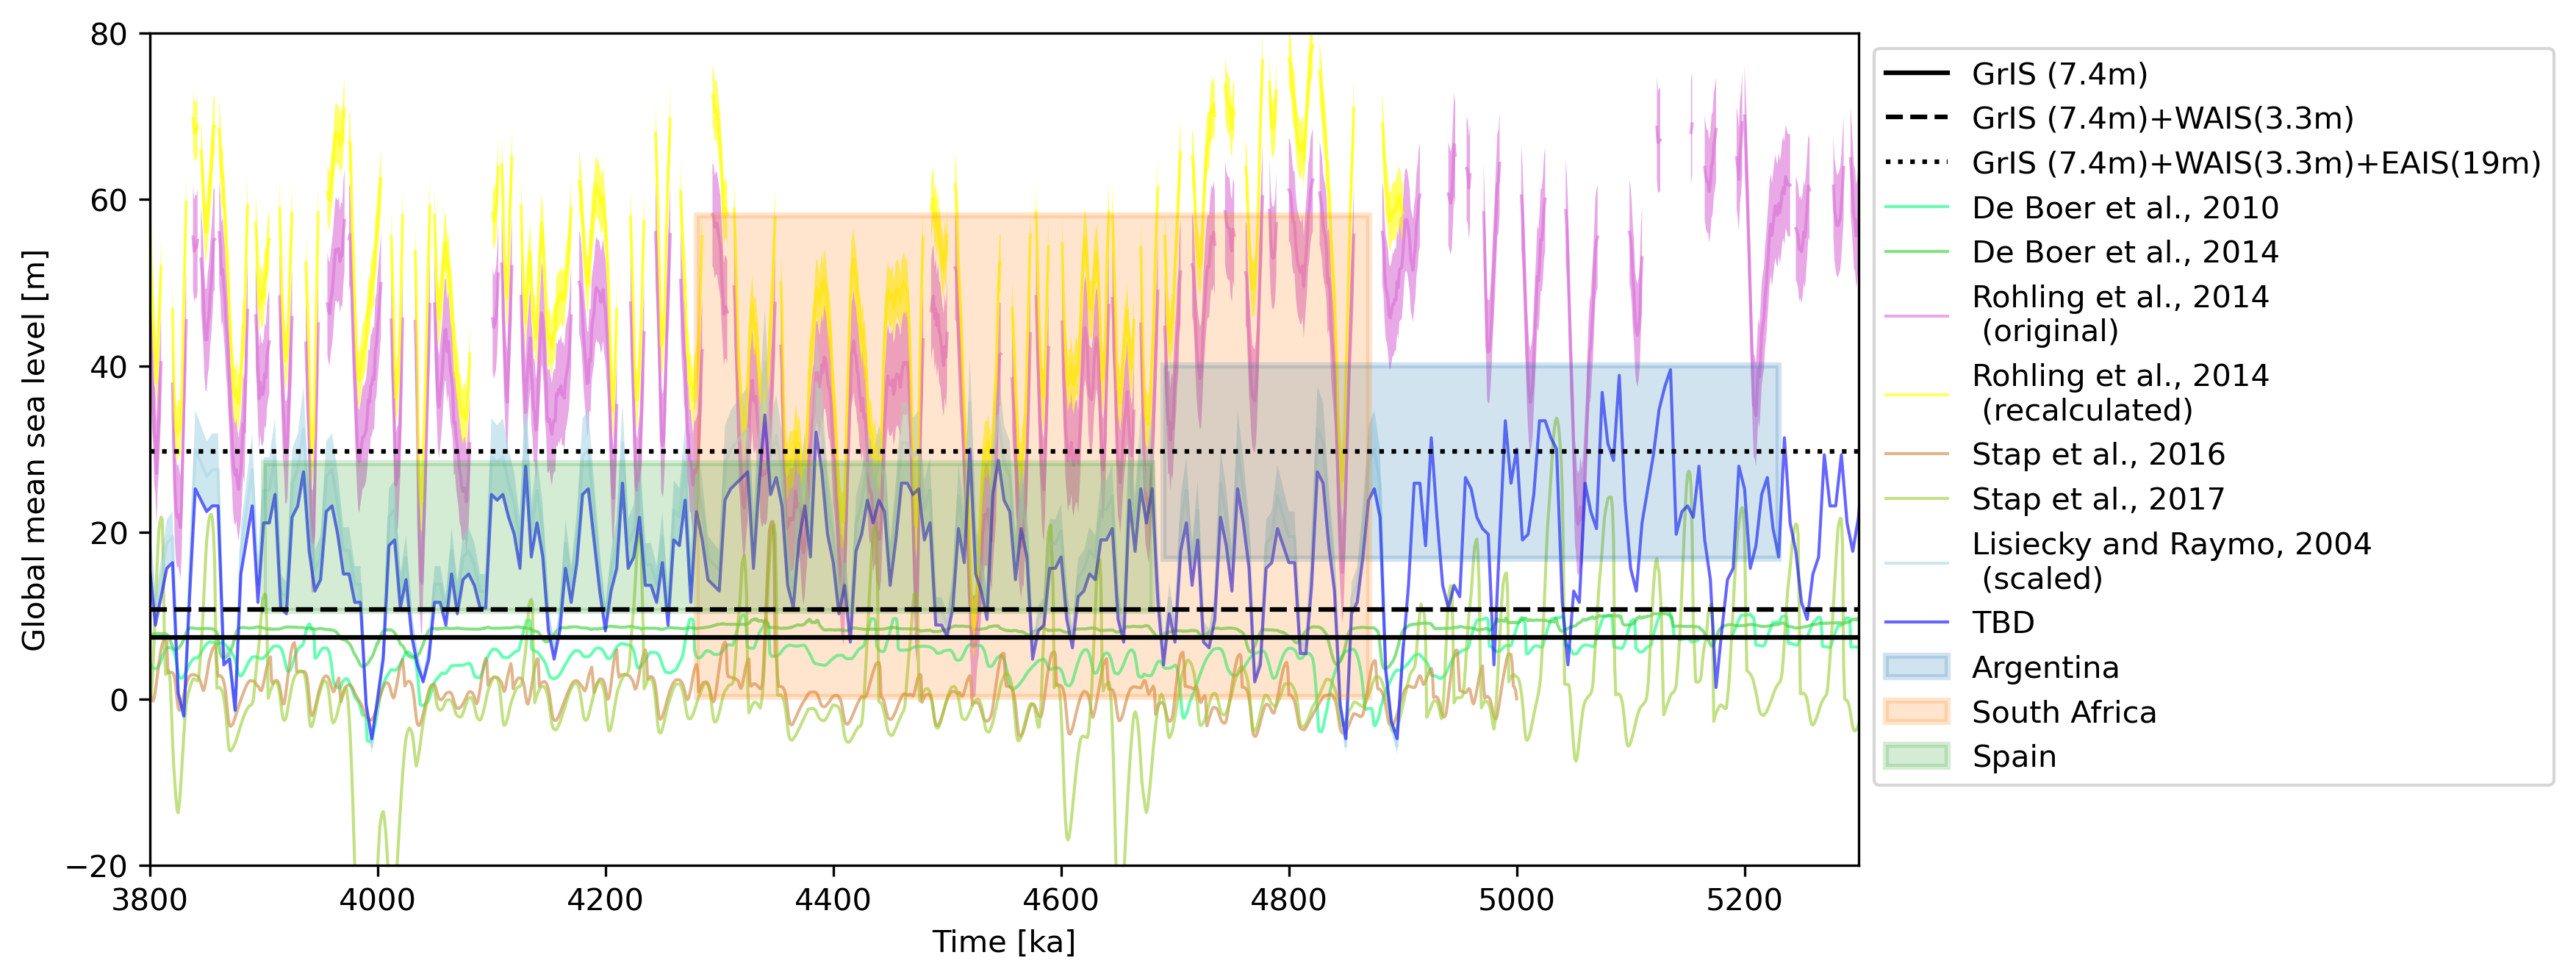

In [16]:
figure=plt.figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')

ax = figure.gca()

#Plot reference lines - comment to unshow
plt.axhline(y=7.4, color='k', linestyle='-',zorder=200,label='GrIS (7.4m)')
plt.axhline(y=10.7, color='k', linestyle='dashed',zorder=200,label='GrIS (7.4m)+WAIS(3.3m)')
plt.axhline(y=29.7, color='k', linestyle='dotted',zorder=200,label='GrIS (7.4m)+WAIS(3.3m)+EAIS(19m)')


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ncolor = 0

for index, row in Obs.iterrows():
 ax.add_patch(patches.Rectangle((row['Min time (ka)'],row['Min SL (m)']),row['Max time (ka)']-row['Min time (ka)'],
                                row['Max SL (m)']-row['Min SL (m)'],fill=True,zorder=100,alpha=0.2,label=row['Site'],
                                facecolor=colors[ncolor],linewidth=2,edgecolor=colors[ncolor]))
 ncolor=ncolor+1

if max(deBoer2010['Time (ka)'])>minTime:
 plt.plot( 'Time (ka)', 'Sea Level (m)', data=deBoer2010,alpha=0.6,color='springgreen', linewidth=1,label='De Boer et al., 2010')

if max(MillerNaish['Time (ka)'])>minTime:
 plt.plot( 'Time (ka)', 'Sea Level (m)', data=MillerNaish, color='rosybrown', linewidth=1,label='Miller et al., 2012 / Naish et al., 2009')
 plt.fill_between('Time (ka)', 'max SL (m)','min SL (m)', data=MillerNaish, facecolor='rosybrown', alpha=0.6)
    
if max(deBoer2014['Time (ka)'])>minTime:
 plt.plot( 'Time (ka)', 'Sea Level (m)', data=deBoer2014, alpha=0.6,color='limegreen', linewidth=1,label='De Boer et al., 2014')

if max(Rohling2014['Time (ka)'])>minTime:
 plt.plot( 'Time (ka)', 'Median Sea Level (m)', data=Rohling2014, alpha=0.6, color='orchid', linewidth=1,label='Rohling et al., 2014 \n (original)')
 plt.fill_between('Time (ka)', '95% top CI (m)','95% bottom CI (m)', data=Rohling2014, facecolor='orchid', alpha=0.6)

if max(Rohling2014_mod['Time (ka)'])>minTime:
 Rohling2014_mod['Upper']=Rohling2014_mod['Sea Level (m)']+Rohling2014_mod['1-sigma SL']
 Rohling2014_mod['Lower']=Rohling2014_mod['Sea Level (m)']-Rohling2014_mod['1-sigma SL']
 plt.plot( 'Time (ka)', 'Sea Level (m)', data=Rohling2014_mod,alpha=0.6, color='yellow', linewidth=1,label='Rohling et al., 2014 \n (recalculated)')
 plt.fill_between('Time (ka)', 'Upper','Lower', data=Rohling2014_mod, facecolor='yellow', alpha=0.6)

if max(Stap2016['Time (ka)'])>minTime:
 plt.plot( 'Time (ka)', 'Sea Level (m)', data=Stap2016,alpha=0.6,color='peru', linewidth=1,label='Stap et al., 2016')

if max(Stap2017['Time (ka)'])>minTime:
 plt.plot( 'Time (ka)', 'Sea Level (m)', data=Stap2017,alpha=0.6,color='yellowgreen', linewidth=1,label='Stap et al., 2017')

if max(SR2009['Time (ka)'])>minTime:
 plt.plot( 'Time (ka)', 'Sea Level (m)', data=SR2009,alpha=0.6, color='chocolate', linewidth=1,label='Sosdian and Rosenthal, 2009')

if max(Elderfield2012['Time (ka)'])>minTime:
 plt.plot( 'Time (ka)', 'Prob max Sea Level (m)', data=Elderfield2012,alpha=0.6,color='plum',linewidth=1,label='Elderfield et al., 2012')
 plt.fill_between('Time (ka)', '95% top CI (m)','95% bottom CI (m)', data=Wang2010, facecolor='plum', alpha=0.6)

if max(Grant2014['Time (ka)'])>minTime:
 plt.plot( 'Time (ka)', 'Prob max Sea Level (m)', data=Grant2014,alpha=0.6, color='teal',linewidth=1,label='Grant et al., 2014')
 plt.fill_between('Time (ka)', '95% top CI (m)','95% bottom CI (m)', data=Grant2014, facecolor='teal', alpha=0.6)

if max(LR2014_scaled['Time (ka)'])>minTime:
 LR2014_scaled['Upper']=LR2014_scaled['Sea Level (m)']+LR2014_scaled['1-sigma SL']
 LR2014_scaled['Lower']=LR2014_scaled['Sea Level (m)']-LR2014_scaled['1-sigma SL']
 plt.plot( 'Time (ka)', 'Sea Level (m)', data=LR2014_scaled,alpha=0.6, color='lightblue', linewidth=1,label='Lisiecky and Raymo, 2004 \n (scaled)')
 plt.fill_between('Time (ka)', 'Upper','Lower', data=LR2014_scaled, facecolor='lightblue', alpha=0.6)

if max(LR2014_2['Time (ka)'])>minTime:
 plt.plot( 'Time (ka)', 'Sea Level (m)', data=LR2014_2,alpha=0.6,color='blue', linewidth=1,label='TBD')
    

plt.xlabel('Time [ka]')
plt.ylabel('Global mean sea level [m]')

plt.axis([minTime,maxTime,minSL,maxSL])
legend=plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig('Sealevelcurves.svg',bbox_extra_artists=(legend,), bbox_inches='tight')  


***
## License
This software is relased under the MIT license.

Copyright 2020 Alessio Rovere

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
***
# Research funding acknowledgments
This script and associated data were created in the framework of the European Reasearch Council Starting Grant WARMCOASTS (Grant Agreement Number 802414), funded under the European Union's Horizon 2020 research and Innovation programme.
***
# How to cite
<a href="https://zenodo.org/badge/latestdoi/243504113"><img align="left" src="https://zenodo.org/badge/243504113.svg" alt="DOI"></a>
<br>